# Generating synthetic data sets of a river bed column forced by monoperiodic river and aquifer temperature signals

2024 developped by Nicolas Flipo from demo_gen_test.ipynb created by Guillaume de Rochefort during MOLONARI 2022 

The object of this demo is to present a class responsible for generating a simulation of pressure and temperature sensor data in cases where data from the CAPTEUR project is not available. Based on the `synthetic_MOLONARI` class in `synthetic_MOLONARI.py`.

We will show the `synthetic_MOLONARI` object which allows generating purely periodic datasets with the possibility of Gaussian noise. We will illustrate the interaction of `synthetic_MOLONARI` with the `Column` class and the `layer` class.

The other demo file `demo_val_direct.ipynb` highlights a more global use of the classes from `synthetic_MOLONARI.py` and `val_analy.py`.


In [2]:
# démo time_series
from pyheatmy import *
import matplotlib.pyplot as plt
import numpy as np




## 1. Signal Parameterization
The signals are purely periodic, and it is necessary to choose the amplitude, period, and mean value of the river temperature, aquifer temperature, and pressure signals (boundary conditions). The T1, T2, T3 sensors in the shaft are only generated using the direct model.

A possible improvement for this class is to generate multi-periodic signals similar to the parameter lists of the layer, where a list of parameters for the different desired frequencies (diurnal, monthly, annual, etc.) would be provided.

In [3]:
# l'utilisateur saisit ses paramètres d'émulation de mesure
"""Fenêtre temporelle"""
# le format demandé est celui-ci : (y,m,d,h,mn,s) compatible avec la librairie datetime
t_debut = (2011, 8, 1)
t_fin = (2011, 8, 31, 23, 59, 59)
dt = 15*NSECINMIN # pas de temps en (s) # A AMELIORER AVEC UN CONVERTISSEUR AUTOMATIQUE D'UNITES

"""Conditions limites"""
# Température de la rivière
zeroT = 0
zeroT += ZERO_CELSIUS  #time_series works only with forcings in celsius. See if it is deeper in pyheatmy or not

T_riv_amp = 5
T_riv_offset = 20  + zeroT
nday = 3
P_T_riv = nday*NHOURINDAY*4*dt #monthly   period
# Température de l'aquifère
T_aq_amp = 0
T_aq_offset = 14 + zeroT
P_T_aq = -9999 # à mettre dans le init
# Pression différentielle
dH_amp = 0
dH_offset = 0.5 #1meter ?
P_dh = -9999 #14*24*4*dt


depth_sensors = [.1, .2, .3, .4]
Zbottom = 0.4

"""Bruit de mesure"""
sigma_meas_P = 0.001
sigma_meas_T = 0.1

print("dt={0:.1f}s".format(dt))

dt=900.0s


## 2 Instantiating the objects `synthetic_MOLONARI` and `Column`
The generated object will have default values, and a series of methods must be used to update its essential parameters. In the initialisation of Time Series, the 3 intermediate temperature sensors T1, T2, T3, are initialized with a linear interpolation between Triv and Taq weighted by the distance from the sensor. Those values initialize the soil Column in a second step. For Time Series dH = Hriv-Haq

Initializing time series
param_time_dates: [(2011, 8, 1), (2011, 8, 31, 23, 59, 59), 900]
param_dH_signal: [0, -9999, 0.5]
param_T_riv_signal: [5, 259200, 293.15]
param_T_aq_signal: [0, -9999, 287.15]
sigma_meas_P: 0.001
sigma_meas_T: 0.1
Entering Hydraulic head differential generation with amplitude 0, period of -9999, offset 0.5, dt 900 --> 
constant signal

Entering T_riv generation with amplitude 5, period of 259200, offset 293.15, dt 900 --> 
periodic signal



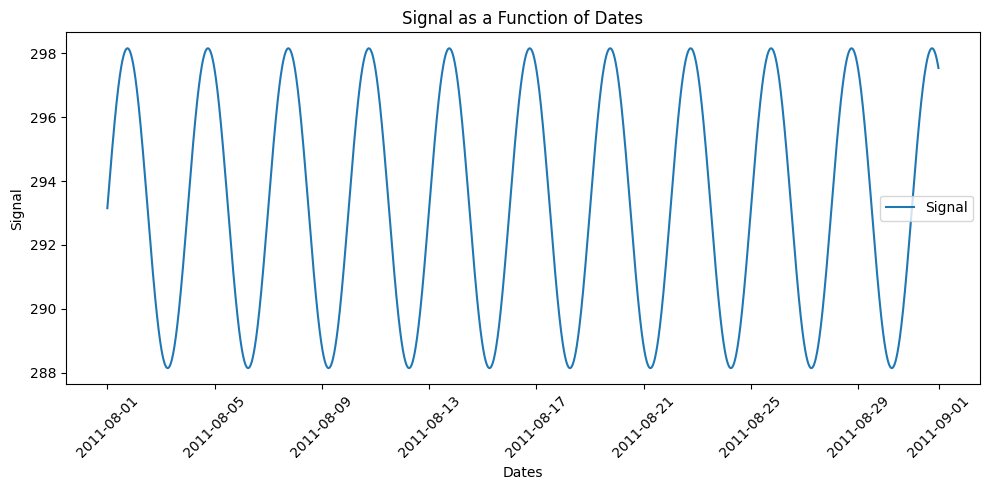

Entering T_aq generation with amplitude 0, period of -9999, offset 287.15, dt 900 --> 
constant signal

Generating Shaft with 4 sensors
4 sensors in the shaft
Temperature of Sensor 0 : [291.65       291.73180582 291.8135727  ... 295.01327278 294.97629062
 294.93772533]
Temperature of Sensor 1 : [290.15       290.20453721 290.25904847 ... 292.39218185 292.36752708
 292.34181689]
Temperature of Sensor 2 : [288.65       288.67726861 288.70452423 ... 289.77109093 289.75876354
 289.74590844]
Temperature of Sensor 3 : [287.15 287.15 287.15 ... 287.15 287.15 287.15]
dH : [(datetime.datetime(2011, 8, 1, 0, 0), (np.float64(0.5003768584366258), np.float64(293.2352814112712))), (datetime.datetime(2011, 8, 1, 0, 15), (np.float64(0.4998621910260485), np.float64(293.2992110607669))), (datetime.datetime(2011, 8, 1, 0, 30), (np.float64(0.500105033681444), np.float64(293.352156310449))), (datetime.datetime(2011, 8, 1, 0, 45), (np.float64(0.500518995794406), np.float64(293.51563130216005))), (datetime.d

In [4]:
"""Instanciation de l'objet Time_series"""
# un dictionnaire qui facilite le paramétrage avec des variables globales définies plus haut
time_series_dict_user1 = {
    "offset":.0,
    "depth_sensors":depth_sensors,
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": [dH_amp, P_dh, dH_offset], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"param_T_riv_signal": [T_riv_amp, P_T_riv, T_riv_offset],
    "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
    "sigma_meas_P": sigma_meas_P,
    "sigma_meas_T": sigma_meas_T, #float
}
# instanciation du simulateur de données
emu_observ_test_user1 = synthetic_MOLONARI.from_dict(time_series_dict_user1)

# print("Checking params synthetic_MOLONARI")
# print("param_time_dates:", emu_observ_test_user1._param_dates)
# print("param_dH_signal:", emu_observ_test_user1._param_dH)
# print("param_T_riv_signal:", emu_observ_test_user1._param_T_riv)
# print("param_T_aq_signal:", emu_observ_test_user1._param_T_aq)
# print("sigma_meas_P:", emu_observ_test_user1._sigma_P)
# print("sigma_meas_T:", emu_observ_test_user1._sigma_T)


print(f"dH : {emu_observ_test_user1._molonariP_data}")
print(f"Tshaft : {emu_observ_test_user1._T_Shaft_measures}")


In [ ]:
# l'utilisateur génère un dictionnaire avec les données importantes de la colonne
name ="Couche en sable"
zLow = Zbottom
moinslog10IntrinK = 11
n = 0.1
lambda_s = 2 # test cas purement advectif
rhos_cs = 4e6

# modèle une couche
layers_list= layersListCreator([(name, zLow, moinslog10IntrinK, n, lambda_s, rhos_cs)])

print(f"Layers list: {layers_list}")

# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
col_dict = {
	"river_bed": 1., 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user1._molonariP_data,
    "T_measures": emu_observ_test_user1._T_Shaft_measures,
    "sigma_meas_P": 0.01, #float
    "sigma_meas_T": 0.1, #float
}
col = Column.from_dict(col_dict,verbose=True)

## 3 Generating temperature in the river bed

We use the [_measures_column_one_layer(col, layers_list, nb_cells)] method, which updates the measurements for T1, T2 and T3 at each point in time with the direct model pyheatmy. The sensor time series are then perturbated with a gaussian noise in the Time series object. We display the temperature simulated at sensors.

In [ ]:
# on résout le modèle direct avec les observations simulées
nb_cells = 100
# print(emu_observ_test_user1._T_Shaft)
emu_observ_test_user1._measures_column_one_layer(col, layers_list, nb_cells)
#emu_observ_test_user1._plot_molonariT_data()
col.plot_temperature_at_sensors(verbose=False)



The simulated temperatures with pyheatmy are compared to the initial values of the Shaft which were interpolated. Without surprise, they are very different for an advective configuration (high k value)

In [ ]:

col.plot_compare_temperatures_sensors()

Here are temperature profiles simulated by pyheatmy

In [ ]:
nt = len(col._temperatures[0,:])
dplot=15
col.plot_temperatures_umbrella(round(nt/dplot))



Now creating a new column created with the generated case study

In [ ]:
# on utilise les mesures générées précédemment dans les init "dH_measures" et "T_measures"
newCol_dict = {
	"river_bed": 1., 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user1._molonariP_data,
    "T_measures": emu_observ_test_user1._molonariT_data,
    "sigma_meas_P": None, #float
    "sigma_meas_T": None, #float
}
newCol = Column.from_dict(newCol_dict)
newCol.compute_solve_transi(layers_list, nb_cells,verbose=True)

nt = len(col._temperatures[0,:])
dplot=15
newCol.plot_temperatures_umbrella(round(nt/dplot))

flows = col.get_flows_solve()
unitLeg="m/s"
title="Débits"
newCol.plot_it_Zt(flows,title,unitLeg,1.04,2)

newCol.print_RMSE_at_sensor()
newCol.plot_compare_temperatures_sensors()
col.plot_CALC_results()
newCol.print_in_file_processed_MOLONARI_dataset(zeroT=0)

# Multilayered riverbed

In [27]:
t_debut = (2011, 8, 1)
t_fin = (2011, 8, 31, 23, 59, 59)
dt = 15*60 # pas de temps en (s)

T_riv_amp = 2
T_riv_offset = 20
P_T_riv = 72*4*dt

T_aq_amp = 0
T_aq_offset = 14
P_T_aq = 9999 # à mettre dans le init

dH_amp = 0
dH_offset = 1.
P_dh = -9999 #14*24*4*dt

depth_sensors = [.1, .15, .25, .3, .4] # on a mis 5 capteurs dans le shaft au lieu de 4 pour montrer que le code s'adapte

In [28]:
time_series_dict_user4 = {
    "offset" : 0,
    "depth_sensors":depth_sensors,
	"param_time_dates": [t_debut, t_fin, dt], 
    "param_dH_signal": [dH_amp, P_dh, dH_offset], #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"param_T_riv_signal": [T_riv_amp, P_T_riv, T_riv_offset],
    "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
    "sigma_meas_P": 0.05,
    "sigma_meas_T": 0.1, #float
}

In [ ]:
emu_observ_test_user4 = Time_series.from_dict(time_series_dict_user4)
# emu_observ_test_user4._generate_all_series()

In [30]:
# l'utilisateur génère un dictionnaire avec les données importantes de la colonne
name = ["gravier","Couche en sable"]
zLow = [.2,.4]
moinslog10IntrinK = [14,10]
n = [.4,.1]
lambda_s = [2,2] 
rhos_cs = [4e6,4e6]

# on utilise les mesures générées précédemment
col_dict4 = {
	"river_bed": 1., 
    "depth_sensors": depth_sensors, #En vrai y aura une 4e valeur ici mais ca prendra en charge pareil
	"offset": .0,
    "dH_measures": emu_observ_test_user4._molonariP_data,
    "T_measures": emu_observ_test_user4._T_Shaft_measures,
    "sigma_meas_P": emu_observ_test_user4._sigma_P, #float
    "sigma_meas_T": emu_observ_test_user4._sigma_T, #float
}

col4 = Column.from_dict(col_dict4)

# modèle une couche
layers_list4= layersListCreator([(name[i], zLow[i], moinslog10IntrinK[i], n[i], lambda_s[i], rhos_cs[i]) for i in range(len(name))])

In [ ]:
nb_cells = 100
emu_observ_test_user4._measures_column_one_layer(col4, layers_list4, nb_cells)
col4.plot_temperature_at_sensors(verbose=False)
# col4.plot_compare_temperatures_sensors()
nt = len(col4._temperatures[0,:])
dplot=15
col4.plot_temperatures_umbrella(round(nt/dplot))


In [ ]:
# les sorties des différents capteurs après passage dans le modèle direct
nt = 3000
plt.plot(emu_observ_test_user4._T_riv_perturb[:nt], label="Triv")
n_sens = len(emu_observ_test_user4._T_Shaft_perturb[0])
for i in range(n_sens-1):
    plt.plot(emu_observ_test_user4._T_Shaft_perturb[:nt,i], label="T{}".format(i+1))
plt.plot(emu_observ_test_user4._T_Shaft_perturb[:nt,n_sens-1], label="Taq")
plt.legend()
plt.grid()

In [ ]:
nt = len(col4._temperatures[0,:])
for i in range(1000,2000):
    plt.plot(col4._temperatures[:,i], -col._z_solve)
plt.ylabel("depth")
plt.xlabel("T (°C)")
plt.grid()
#plt.xlim(282,286)

In [ ]:
plt.imshow(col._temperatures[:,:], aspect='auto')

Unfinished, now need to rerun a column with the proper sensor records from the first simulation + perturbation that are in Time Series See final step of #3 of the Monolayer case